# DeepCox for simulated data

## Introduction

Let's use module `DeepCox` in `libsurv` to build a neural network for predicting hazard ratio. This notebook 
will show you how to build and train a neural network with the help of `libsurv`.

## Preparation

For all things going well, you would be better to get acquainted with **Survival Analysis**. Otherwise, I suggest you read the [reference](https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html).


## Get it started

### Obtain datasets 

Here we use the module `libsurv.datasets` to obtain the simulated survival datasets.

In [1]:
from libsurv.datasets import load_simulated_data

### generate simulated data (Pandas.DataFrame)
# data configuration: 
#     hazard ratio = 2000
#     number of features = 10
#     number of valid features = 2

# No. of training data = 2000
train_data = load_simulated_data(2000, N=2000, num_var=2, num_features=10, seed=1)
# No. of training data = 800
test_data = load_simulated_data(2000, N=800, num_var=2, num_features=10, seed=1)

train_data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,e,t
0,-0.165956,0.440649,-0.999771,-0.395335,-0.706488,-0.815323,-0.627480,-0.308879,-0.206465,0.077633,1,0.933961
1,-0.161611,0.370439,-0.591096,0.756235,-0.945225,0.340935,-0.165390,0.117380,-0.719226,-0.603797,1,0.242949
2,0.601489,0.936523,-0.373152,0.384645,0.752778,0.789213,-0.829912,-0.921890,-0.660339,0.756285,0,15.000000
3,-0.803306,-0.157785,0.915779,0.066331,0.383754,-0.368969,0.373002,0.669251,-0.963423,0.500289,0,15.000000
4,0.977722,0.496331,-0.439112,0.578559,-0.793548,-0.104213,0.817191,-0.412772,-0.424449,-0.739943,0,15.000000


### Dataset statistics

Print statistics of survival data. The function `survival_stats` in `libsurv.datasets` provides the tool.

--------------- Survival Data Statistics ---------------
# Rows: 2000
# Columns: 10 + e + t
# Events Ratio: 73.55%
# Min Time: 0.0001404392
# Max Time: 15.0



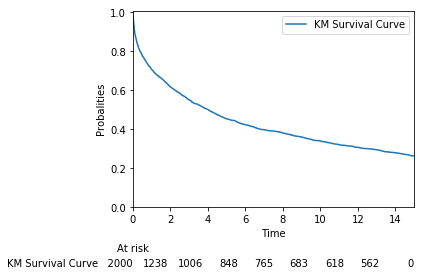

In [2]:
from libsurv.datasets import survival_stats

survival_stats(train_data, t_col="t", e_col="e", plot=True)

--------------- Survival Data Statistics ---------------
# Rows: 800
# Columns: 10 + e + t
# Events Ratio: 73.62%
# Min Time: 0.00054798834
# Max Time: 15.0



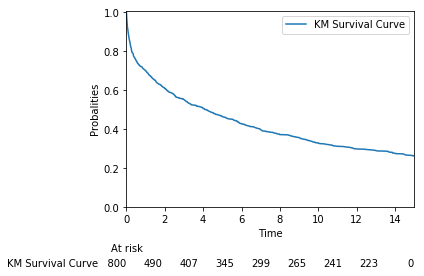

In [3]:
survival_stats(test_data, t_col="t", e_col="e", plot=True)

### Survival data transfrom

The column of time and status in survival data will be packed into an new column in the transformed data.

So you can see, the transformed survival data contains an new label, where negtive values are considered as right censored, and positive values are considered as event occurrence.

**NOTE**: In `libsurv`, survival data must be transformed via `tfdeepsurv.datasets.survival_df`.

In [4]:
from libsurv.datasets import survival_df

surv_train = survival_df(train_data, t_col="t", e_col="e", label_col="Y")
surv_test = survival_df(test_data, t_col="t", e_col="e", label_col="Y")

# columns 't' and 'e' are packed into an new column 'Y'
surv_train.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,Y
0,-0.165956,0.440649,-0.999771,-0.395335,-0.706488,-0.815323,-0.627480,-0.308879,-0.206465,0.077633,0.933961
1,-0.161611,0.370439,-0.591096,0.756235,-0.945225,0.340935,-0.165390,0.117380,-0.719226,-0.603797,0.242949
2,0.601489,0.936523,-0.373152,0.384645,0.752778,0.789213,-0.829912,-0.921890,-0.660339,0.756285,-15.000000
3,-0.803306,-0.157785,0.915779,0.066331,0.383754,-0.368969,0.373002,0.669251,-0.963423,0.500289,-15.000000
4,0.977722,0.496331,-0.439112,0.578559,-0.793548,-0.104213,0.817191,-0.412772,-0.424449,-0.739943,-15.000000


### Model initialization

Here we start to initialize a DeepCox model.

In [5]:
from libsurv import DeepCox

input_nodes = 10
hidden_layers_nodes = [6, 3, 1]

# the arguments of dsnn can be obtained by Bayesian Hyperparameters Tuning
nn_config = {
    "learning_rate": 0.7,
    "learning_rate_decay": 1.0,
    "activation": 'relu', 
    "L1_reg": 3.4e-5, 
    "L2_reg": 8.8e-5, 
    "optimizer": 'sgd',
    "dropout_keep_prob": 1.0,
    "seed": 1
}
# ESSENTIAL STEP: Pass arguments
model = DeepCox(
    input_nodes, 
    hidden_layers_nodes,
    nn_config
)
# ESSENTIAL STEP: Build Computation Graph
model.build_graph()

### Model training

You can save your trained model by passing `save_model="file_name.ckpt"` or load your trained model by passing `load_model="file_name.ckpt"`

Average loss at step 100: 7.07983
Average loss at step 200: 7.07982
Average loss at step 300: 7.07981
Average loss at step 400: 7.07980
Average loss at step 500: 7.07980
Average loss at step 600: 7.07979
Average loss at step 700: 7.07978
Average loss at step 800: 7.07977
Average loss at step 900: 7.07977
Average loss at step 1000: 7.07704
Average loss at step 1100: 6.87123
Average loss at step 1200: 6.45434
Average loss at step 1300: 6.37069
Average loss at step 1400: 6.33944
Average loss at step 1500: 6.32291
Average loss at step 1600: 6.29438
Average loss at step 1700: 6.29165
Average loss at step 1800: 6.29007
Average loss at step 1900: 6.28687


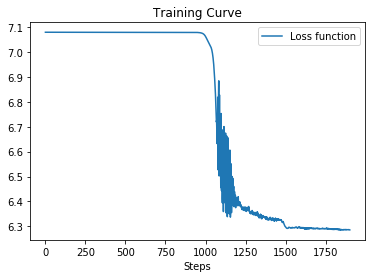

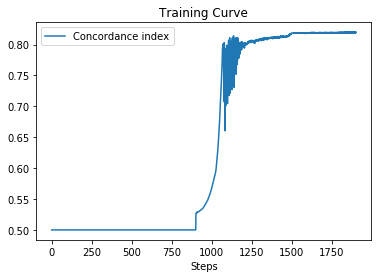

In [6]:
Y_col = ["Y"]
X_cols = [c for c in surv_train.columns if c not in Y_col]

# model saving and loading is also supported!
# read comments of `train()` function if necessary.
watch_list = model.train(
    surv_train[X_cols], surv_train[Y_col],
    num_steps=1900,
    num_skip_steps=100,
    plot=True,
    silent=False
)

### Model evaluation

Model evaluation via method `DeepCox.evals()`.

In [7]:
print("CI on training data:", model.evals(surv_train[X_cols], surv_train[Y_col]))
print("CI on test data:", model.evals(surv_test[X_cols], surv_test[Y_col]))

CI on training data: 0.8193206851448683
CI on test data: 0.8175830825866967


### Model prediction

Model prediction includes two methods:
- predicting hazard ratio or log hazard ratio
- predicting survival function

In [8]:
# predict log hazard ratio
print(model.predict(surv_test.loc[0:4, X_cols]))

# predict hazard ratio
print(model.predict(surv_test.loc[0:4, X_cols], output_margin=False))

[[4.629786 ]
 [4.8222055]
 [0.       ]
 [1.4019105]
 [0.       ]]
[[102.49213 ]
 [124.2388  ]
 [  1.      ]
 [  4.062955]
 [  1.      ]]


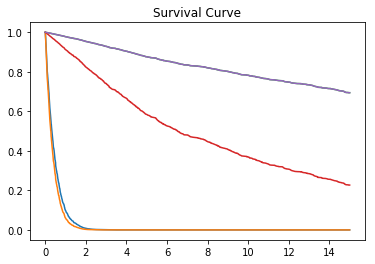

,0.00014043919509276748,0.00039331152220256627,0.00126435118727386,0.0027157075237482786,0.002904581604525447,0.0030980780720710754,0.003499445738270879,0.0036616716533899307,0.004621267784386873,0.004637269768863916,...,14.737560272216797,14.74014663696289,14.750370979309082,14.778524398803711,14.781179428100586,14.794774055480957,14.816924095153809,14.933478355407715,14.945713996887207,15.0
0,0.999388,0.998775,0.998159,0.997543,0.996925,0.996304,0.995678,0.995050,0.994421,0.993786,...,1.230686e-16,1.117655e-16,1.014383e-16,9.202992e-17,8.347148e-17,7.569418e-17,6.862914e-17,6.220573e-17,5.636893e-17,5.636893e-17
1,0.999258,0.998515,0.997769,0.997023,0.996274,0.995521,0.994763,0.994003,0.993241,0.992472,...,5.180973e-20,4.609930e-20,4.098780e-20,3.642605e-20,3.236135e-20,2.874343e-20,2.552441e-20,2.265803e-20,2.010723e-20,2.010723e-20
2,0.999994,0.999988,0.999982,0.999976,0.999970,0.999964,0.999958,0.999952,0.999945,0.999939,...,6.994715e-01,6.988143e-01,6.981536e-01,6.974908e-01,6.968269e-01,6.961623e-01,6.954970e-01,6.948305e-01,6.941629e-01,6.941629e-01
3,0.999976,0.999951,0.999927,0.999902,0.999878,0.999853,0.999828,0.999803,0.999778,0.999753,...,2.340494e-01,2.331573e-01,2.322629e-01,2.313684e-01,2.304749e-01,2.295830e-01,2.286930e-01,2.278038e-01,2.269158e-01,2.269158e-01
4,0.999994,0.999988,0.999982,0.999976,0.999970,0.999964,0.999958,0.999952,0.999945,0.999939,...,6.994715e-01,6.988143e-01,6.981536e-01,6.974908e-01,6.968269e-01,6.961623e-01,6.954970e-01,6.948305e-01,6.941629e-01,6.941629e-01


In [9]:
# predict survival function
model.predict_survival_function(surv_test.loc[0:4, X_cols], plot=True)

### tf.session close

To release resources, we use `DeepCox.close_session()` to close session in tensorflow!

In [10]:
model.close_session()

Current session closed.
